In [1]:
import numpy as np
from scipy.integrate import solve_ivp

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText



In [2]:
plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["text.usetex"] = False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = np.array([6,54,148])/255

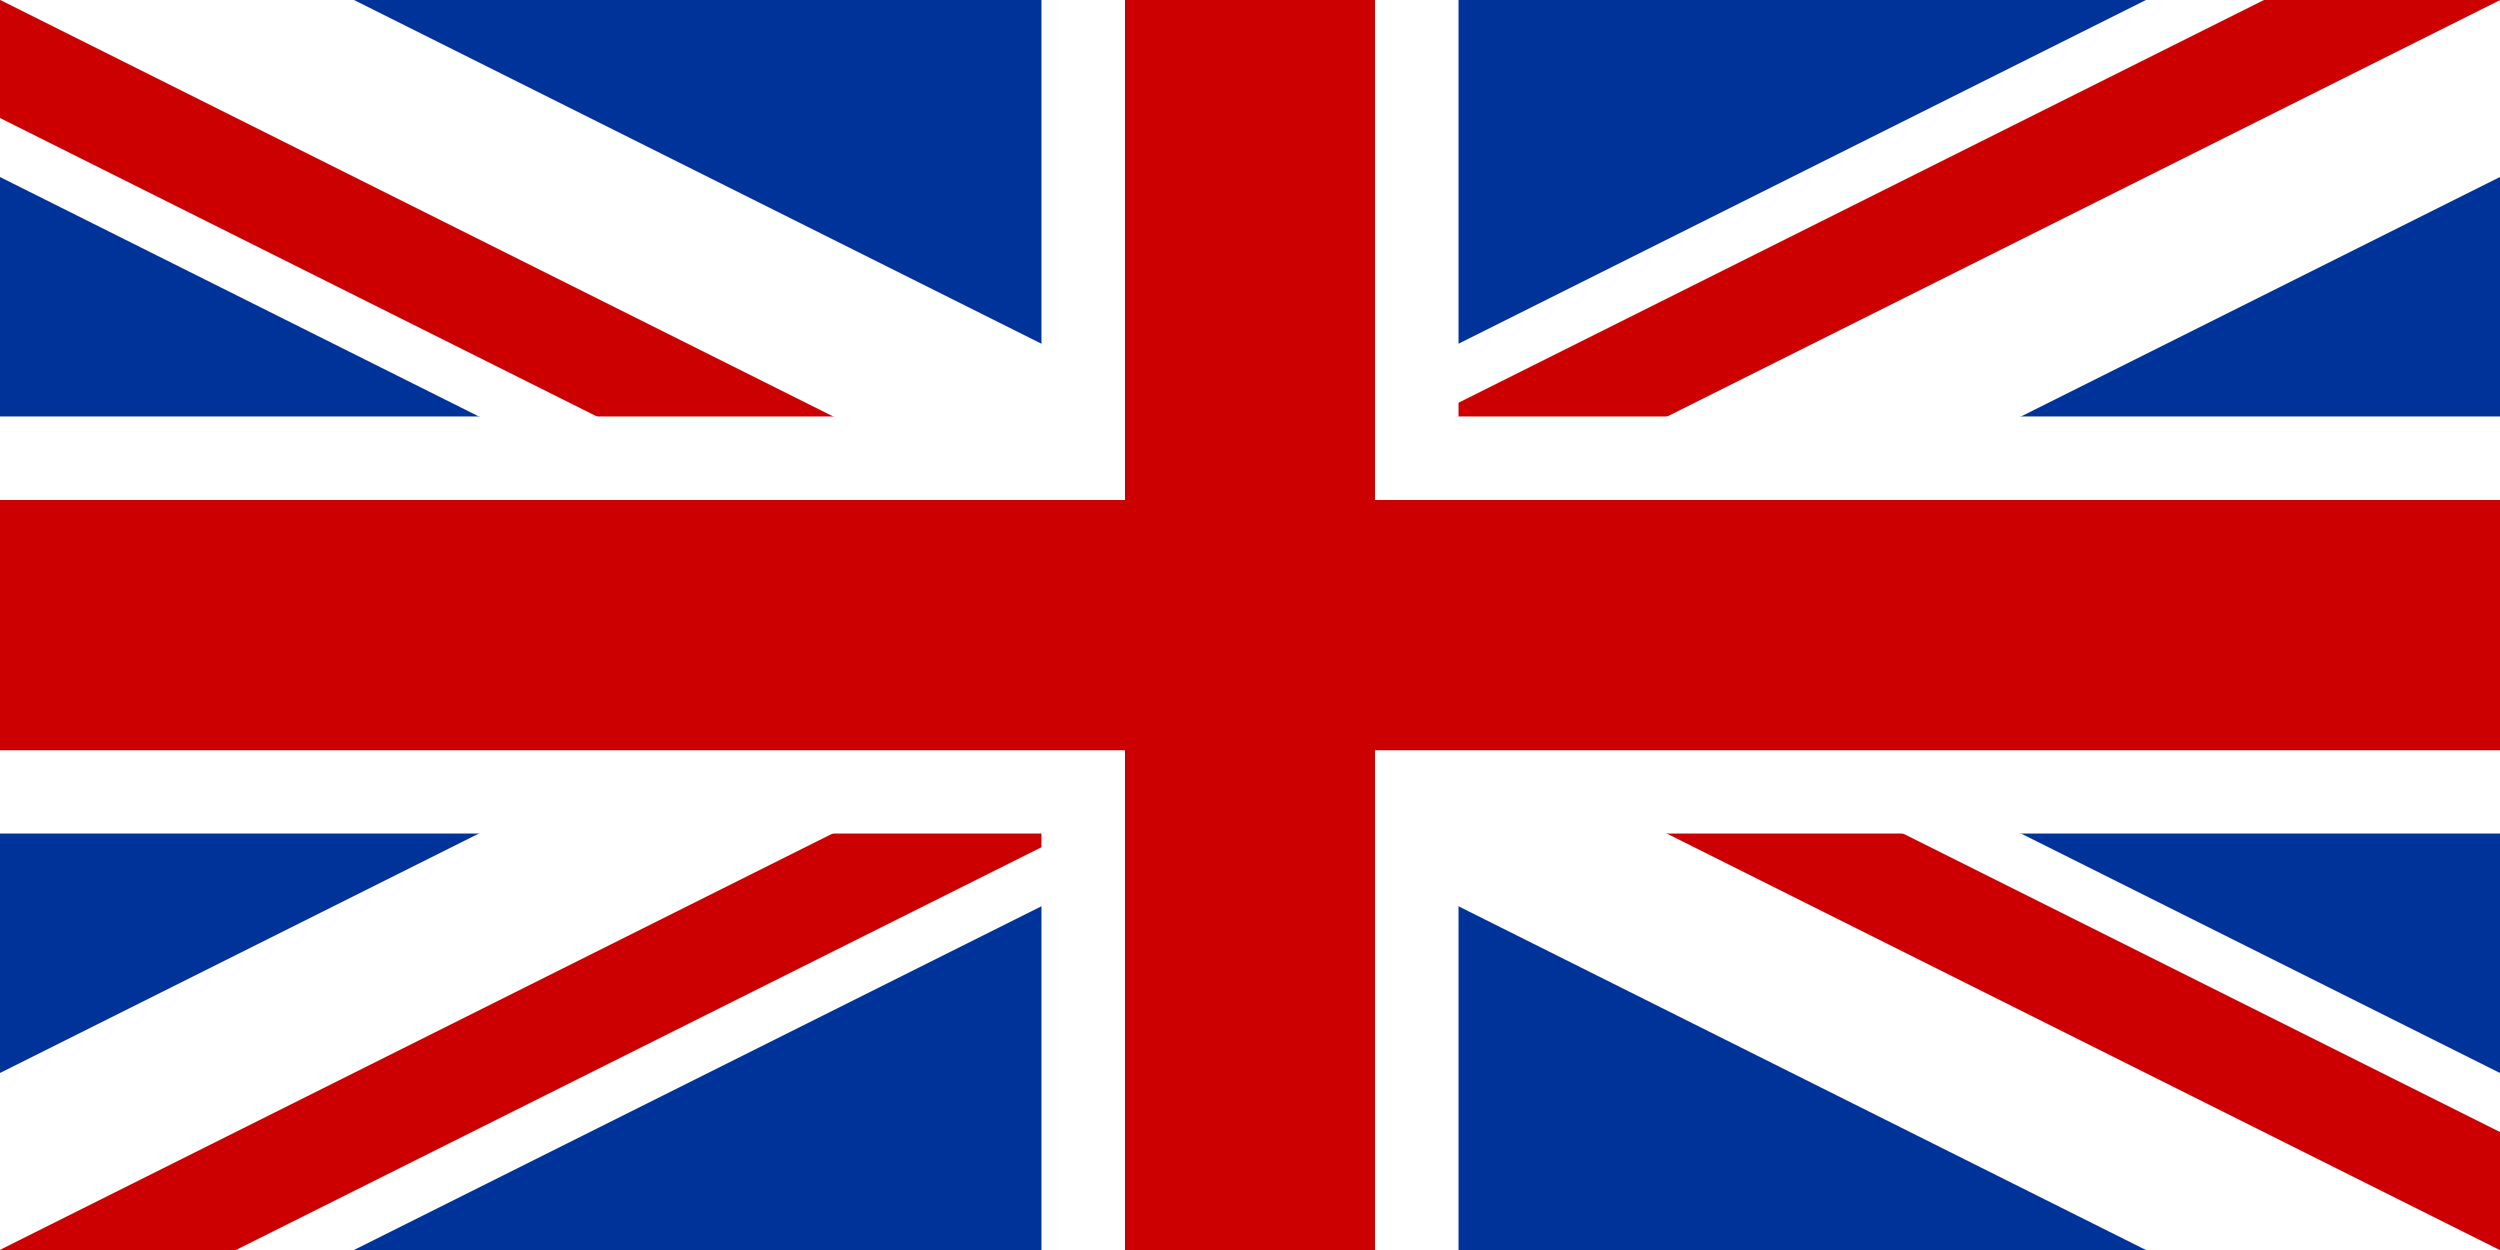

In [3]:
from PIL import Image


with Image.open("SRwfu.png") as im:
    
    im.show()
    
    UnionJack = im

In [80]:
# Call this once
def CompileNBodyState(Stars, AtRest = False, vXs = [0.71,-0.61,0,0], vYs = [0,0,0.209,-0.112]):
    State = []
    
    i = 0
    for Star in Stars:
        
        State.append(Star[0])
        State.append(Star[1])
        
        if AtRest:
            State.append(0)
            State.append(0)
            
        else:
            State.append(vXs[i])
            State.append(vYs[i])
            
        i+=1
    
    return np.array(State)
        
# Call this at every loop
def UpdateStars(Stars,State):
    i = 0
    for Star in Stars:
        Star[0] = State[i]
        Star[1] = State[i+1]
        i += 4
        
    return Stars
    

In [81]:
def Initialize():
    
    Star1 = [180,24,14,1]

    Star2 = [180,96,12,1]

    Star3 = [180 + 24 * np.cos(8 * np.pi / 180), 72 + 24 * np.sin(8 * np.pi / 180), 10, 1]

    Star4 = [180 - 28 * np.cos(8 * np.pi / 180), 72 - 28 * np.sin(8 * np.pi / 180), 12, 1]

    Stars = [Star1,Star2,Star3,Star4]
    
    States = CompileNBodyState(Stars, AtRest = False)
    
    return Stars, States

In [82]:
# Carried over from FW's other projects

def NBodyAdvance(State, Stars, dt):
    
    dTMdt = 0*State # Same Shape
    
    for i in range(len(Stars)):
        
        #0,4,8,12,...
        Ind = int(4*i)
           
        #X,Y
        poslocal = State[Ind:Ind+2]

        #XDOT
        dTMdt[Ind]   =  State[Ind+2]
        #YDOT
        dTMdt[Ind+1] =  State[Ind+3]
        #XDDOT
        dTMdt[Ind+2] =  0
        #YDDOT
        dTMdt[Ind+3] =  0
        
        for ii in range(len(Stars)):
            
            if (ii != i):
                
                IndX = int(4*ii)
                
                poslocalX = np.array([State[IndX],State[IndX+1]])
                
                rV = poslocalX - poslocal
                
                rVL = np.linalg.norm(rV) # Positive

                F = 1/(rVL)**3
                
                # Differentiated within Note 000.0F
                
                #XDDOT
                dTMdt[Ind+2] = dTMdt[Ind+2] + 0.1*Stars[ii][2]**2*F*rV[0]
                #YDDOT
                dTMdt[Ind+3] = dTMdt[Ind+3] + 0.1*Stars[ii][2]**2*F*rV[1]


    return State + dTMdt*dt



In [106]:
def PlotSingle(Stars):
    
    
    
    fig = plt.figure(figsize = (24,24), dpi = 100)
    #ax = fig.add_subplot(111)
    
    ax = plt.axes([0., 0., 1., .8], frameon=True, xticks=[],yticks=[])
    ax.set_aspect("equal")

    ax.set_xlim(0,240)
    ax.set_ylim(0,120)

    for Star in Stars:

        ax.scatter(Star[0],Star[1], marker = "*", color = "#C8102E", s = 10**2 * Star[2]**2, linewidths=5, edgecolor="w")

        ax.imshow(UnionJack, extent = (0,120,60,120))


    
    

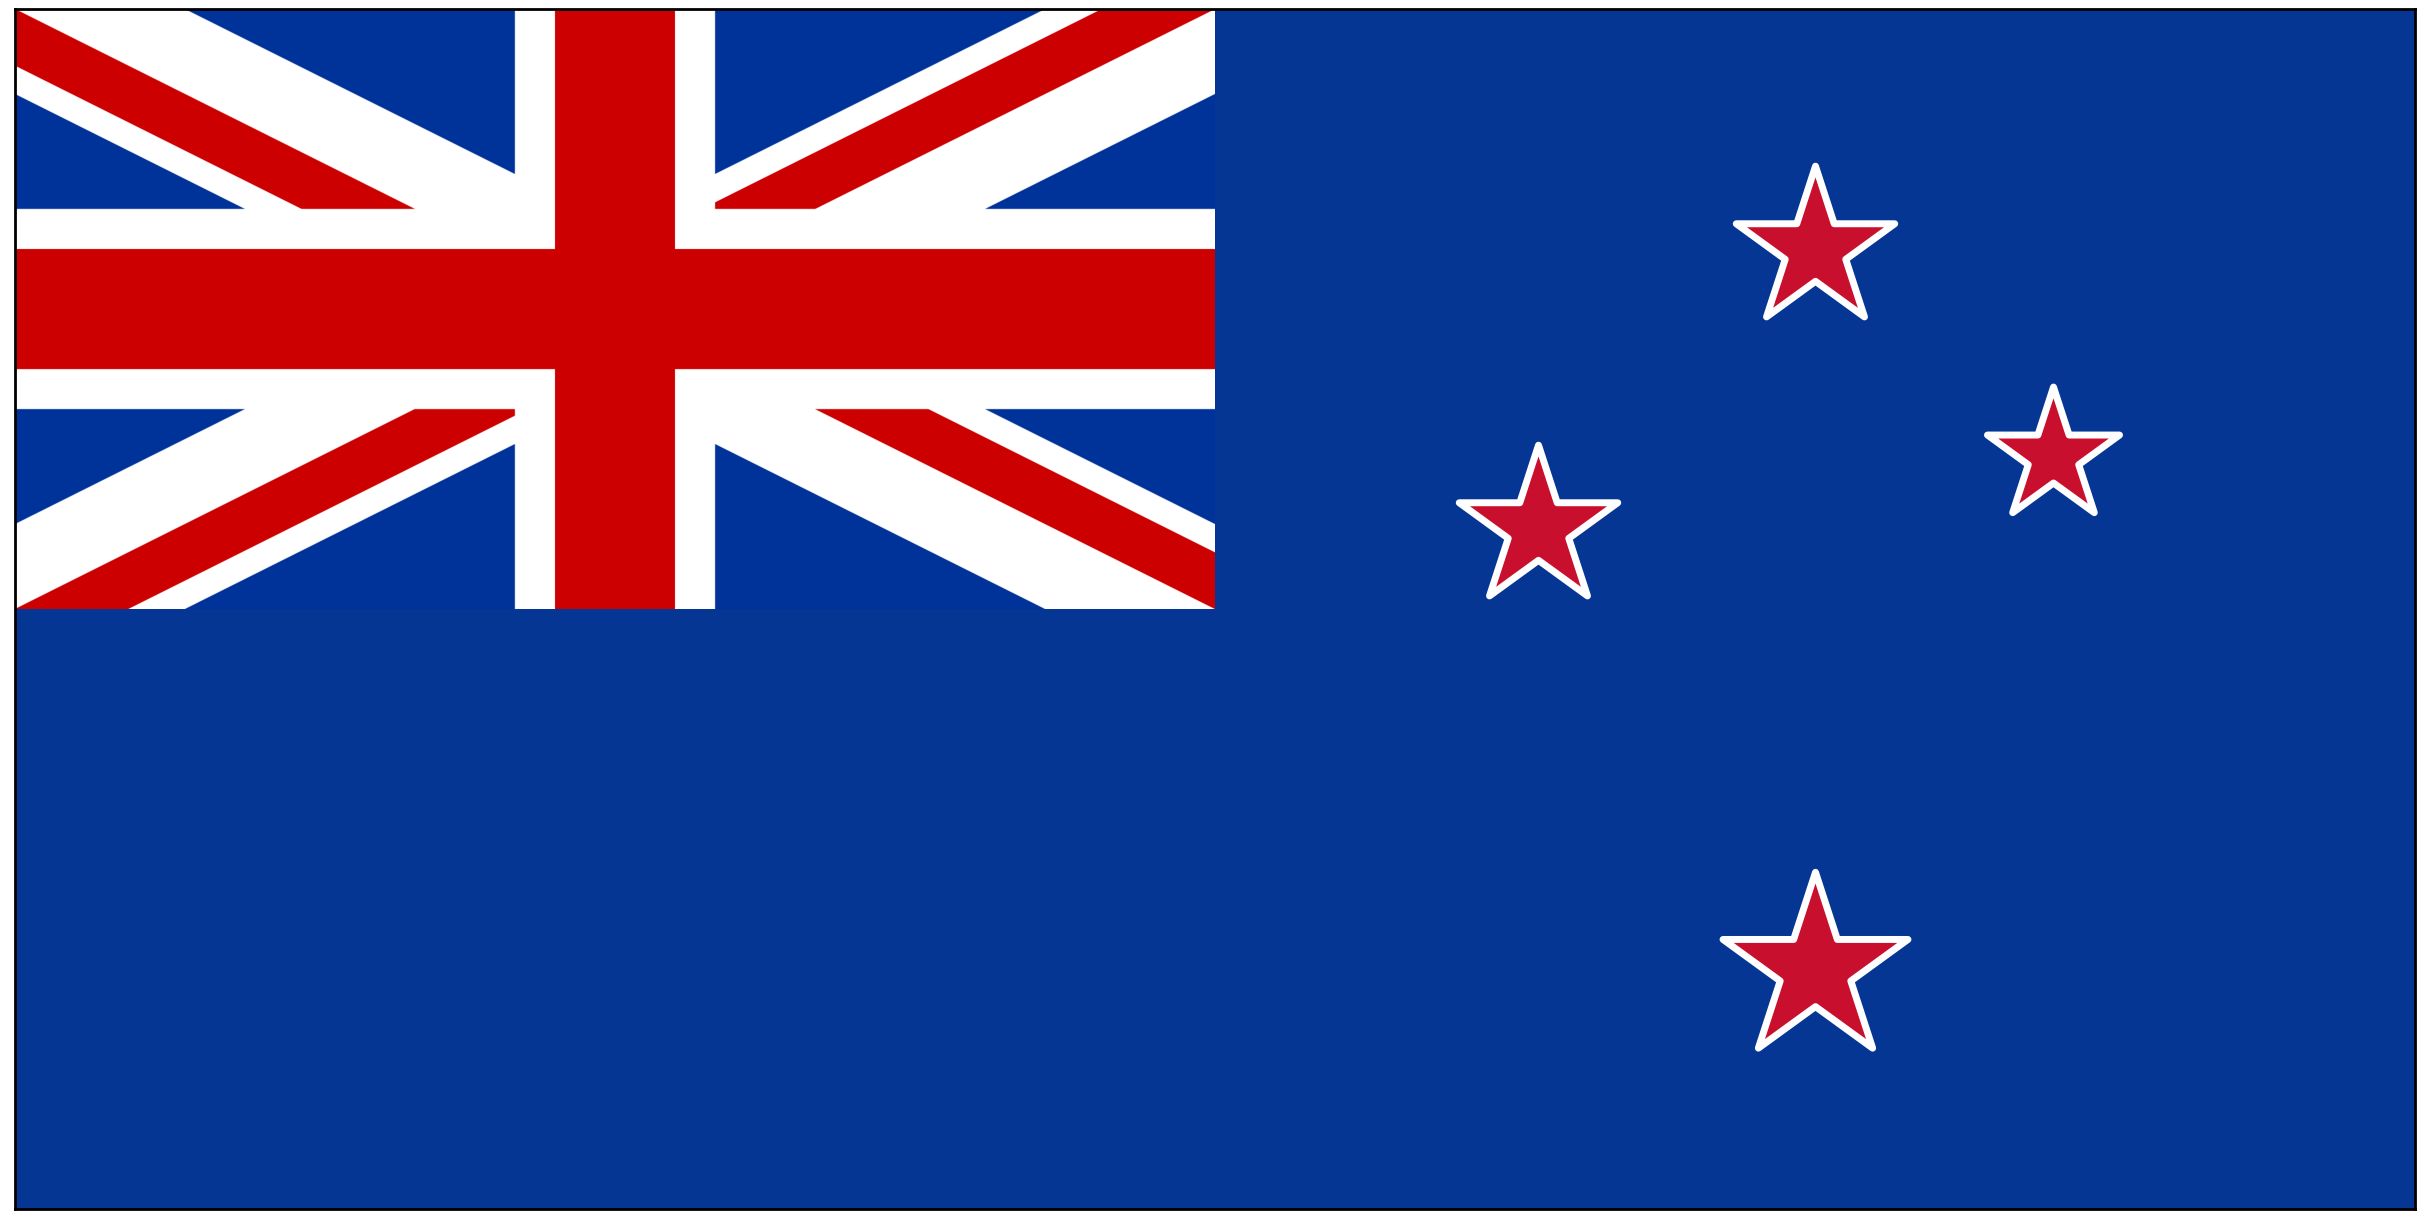

In [107]:
Stars, State = Initialize()

PlotSingle(Stars)

[[ 1.80000000e+02  2.40000000e+01  7.10000000e-01  0.00000000e+00]
 [ 1.80000000e+02  9.60000000e+01 -6.10000000e-01  0.00000000e+00]
 [ 2.03766434e+02  7.53401544e+01  0.00000000e+00  2.09000000e-01]
 [ 1.52272494e+02  6.81031532e+01  0.00000000e+00 -1.12000000e-01]]
Rendered Frame  0
Rendered Frame  0
Rendered Frame  10
Rendered Frame  20
Rendered Frame  30
Rendered Frame  40
Rendered Frame  50
Rendered Frame  60
Rendered Frame  70
Rendered Frame  80
Rendered Frame  90
Rendered Frame  100
Rendered Frame  110
Rendered Frame  120
Rendered Frame  130
Rendered Frame  140
Rendered Frame  150
Rendered Frame  160
Rendered Frame  170
Rendered Frame  180
Rendered Frame  190
Rendered Frame  200
Rendered Frame  210
Rendered Frame  220
Rendered Frame  230
Rendered Frame  240
Rendered Frame  250
Rendered Frame  260
Rendered Frame  270
Rendered Frame  280
Rendered Frame  290
Rendered Frame  300
Rendered Frame  310
Rendered Frame  320
Rendered Frame  330
Rendered Frame  340
Rendered Frame  350
Rend

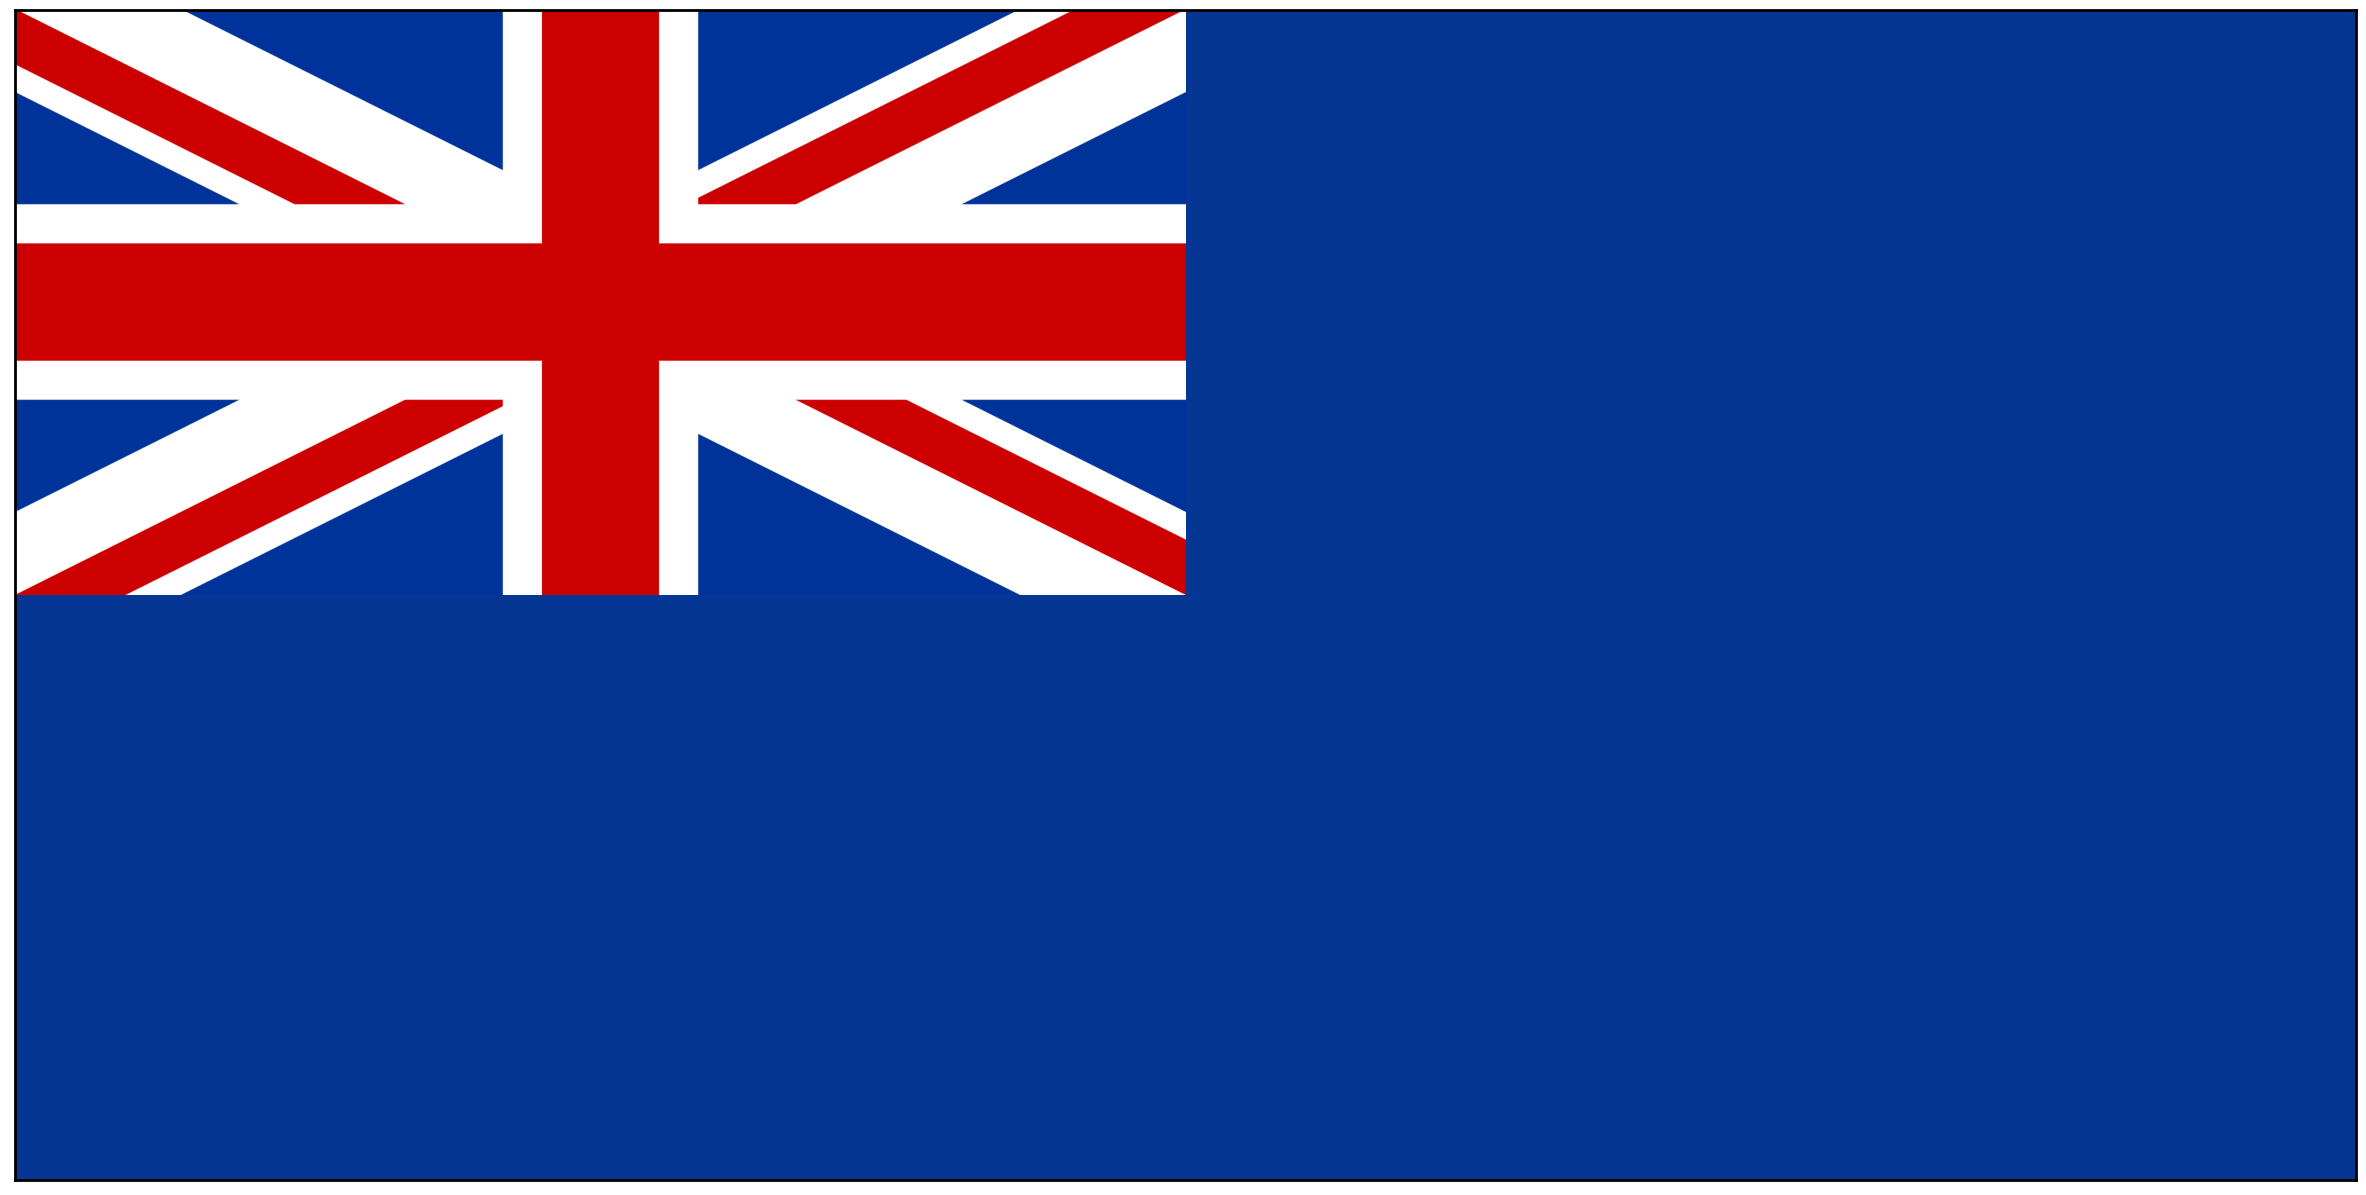

In [108]:
Stars, State = Initialize()

print(np.reshape(State,(4,-1)))

# Animate!

fig = plt.figure(figsize = (24,24), dpi = 100)
ax = fig.add_subplot(111)
ax.set_aspect("equal")

ax.set_xlim(0,240)
ax.set_ylim(0,120)

ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()

def animateNZ(i):
    ax.cla()
    
    global Stars, State
    
    for Star in Stars:
        ax.scatter(Star[0],Star[1], marker = "*", color = "#C8102E", s =10**2 * Star[2]**2, linewidths=5, edgecolor="w")

    ax.imshow(UnionJack, extent = (0,120,60,120))


    ax.set_aspect('equal')
    
    ax.set_xlim(0,240)
    ax.set_ylim(0,120)

    ax.set_xticks([])
    ax.set_yticks([])

    
    State = NBodyAdvance(State,Stars,0.49)
    
    Stars = UpdateStars(Stars,State)
    
    if i%10 == 0:
        
        print("Rendered Frame ",i)

    
interval = 0.15  #in seconds

ani = matplotlib.animation.FuncAnimation(fig,
                                          animateNZ,
                                          600,
                                          interval=interval * 1e+3,
                                          blit=False)

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=60, metadata=dict(artist='PyUltraLightF'))

ani.save("NZ.mp4", writer=writer)
